# LOAD DATA
## Data can be loaded as:
### df = pd.read_csv(filename)
### where filename can be defined as filename = 'url' if you are using an online link or 'filepath' if the data is on a local drive. If file type is xslx or txt then replace csv with xslx or txt

In [117]:
# The code was removed by Watson Studio for sharing.

,h,p,K,Sw,k/Uob,T,API,Pi,"Uoi, cp",Uw,Rsi,OOIP,Produced,RF
0,8.0,0.203,42.3,0.308,56.40,85,43.5,630,0.75,0.988,407,839,150,0.18
1,10.0,0.200,59.0,0.441,28.23,92,34.0,1513,2.09,0.992,375,735,147,0.20
2,17.9,0.126,45.0,0.150,68.18,134,40.0,3050,0.66,0.528,790,535,78,0.15
3,8.0,0.285,312.0,0.290,1040.00,205,40.9,3630,0.30,0.299,830,1107,330,0.30
4,13.0,0.200,166.0,0.300,212.82,178,38.6,1300,0.81,0.367,235,922,138,0.15


In [118]:
%%capture
! pip install seaborn
import matplotlib as plot 
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import sklearn
import tensorflow
import pylab as pl
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn import datasets
%matplotlib inline

<h2 id="data_cleaning">Data Cleaning</h2>
Remove unnecessary columns and leaving on relevant features.

In [119]:
# Lets select some features that we want to use.

df_data = df_data.drop(df_data.columns[-1], axis=1)
df_data.head(10)

,h,p,K,Sw,k/Uob,T,API,Pi,"Uoi, cp",Uw,Rsi,OOIP,Produced
0,8.0,0.203,42.3,0.308,56.40,85,43.5,630,0.75,0.988,407,839,150
1,10.0,0.200,59.0,0.441,28.23,92,34.0,1513,2.09,0.992,375,735,147
2,17.9,0.126,45.0,0.150,68.18,134,40.0,3050,0.66,0.528,790,535,78
3,8.0,0.285,312.0,0.290,1040.00,205,40.9,3630,0.30,0.299,830,1107,330
4,13.0,0.200,166.0,0.300,212.82,178,38.6,1300,0.81,0.367,235,922,138
5,10.0,0.195,328.0,0.207,404.94,186,36.6,1334,0.87,0.341,220,1018,211
6,10.2,0.131,1.7,0.351,4.15,133,44.0,2000,0.40,0.611,830,440,58
7,14.0,0.198,58.0,0.390,98.31,94,48.5,1140,0.59,0.912,474,758,144
8,45.0,0.316,950.0,0.260,2021.28,198,34.0,4850,0.49,0.332,752,1287,190
9,300.0,0.214,83.4,0.370,93.67,185,33.0,2600,0.90,0.355,550,799,174


<h3 id="correct_data_format">Correct data format</h3>

<p>Make sure that all data is in the correct format by listing the data types for each column.</p>

In [120]:
df_data.dtypes

h           float64
p           float64
K           float64
Sw          float64
k/Uob       float64
T             int64
API         float64
Pi            int64
Uoi, cp     float64
Uw          float64
Rsi           int64
OOIP          int64
Produced      int64
dtype: object

<h4>Evaluating for Missing Data</h4>

<p>To proceed, missing data needs to be accounted for and the necessary cleaning process (remove or replace) applied.</p>

In [121]:
# Count missing data if present
missing_df_data = df_data.isnull()
for column in missing_df_data.columns.values.tolist():
    print(column)
    print (missing_df_data[column].value_counts())
    print("") 

h
False    139
Name: h, dtype: int64

p
False    139
Name: p, dtype: int64

K
False    139
Name: K, dtype: int64

Sw
False    139
Name: Sw, dtype: int64

k/Uob
False    139
Name: k/Uob, dtype: int64

T
False    139
Name: T, dtype: int64

API
False    139
Name: API, dtype: int64

Pi
False    139
Name: Pi, dtype: int64

Uoi, cp
False    139
Name: Uoi, cp, dtype: int64

Uw
False    139
Name: Uw, dtype: int64

Rsi
False    139
Name: Rsi, dtype: int64

OOIP
False    139
Name: OOIP, dtype: int64

Produced
False    139
Name: Produced, dtype: int64



In [122]:
# Print number of missing data. Check RHOB column

print("number of NaN values for the column K :", df_data['K'].isnull().sum())
print("number of NaN values for the column T :", df_data['T'].isnull().sum())
print("number of NaN values for the column API :", df_data['API'].isnull().sum())
print("number of NaN values for the column Pi :", df_data['Pi'].isnull().sum())
print("number of NaN values for the column Uoi, cp :", df_data['Uoi, cp'].isnull().sum())
print("number of NaN values for the column Rsi :", df_data['Rsi'].isnull().sum())
print("number of NaN values for the column OOIP :", df_data['OOIP'].isnull().sum())
print("number of NaN values for the column Produced :", df_data['Produced'].isnull().sum())
print("number of NaN values for the column RF :", df_data['h'].isnull().sum())
print("number of NaN values for the column OOIP :", df_data['p'].isnull().sum())
print("number of NaN values for the column Produced :", df_data['k/Uob'].isnull().sum())
print("number of NaN values for the column RF :", df_data['Uw'].isnull().sum())
print("number of NaN values for the column RF :", df_data['Sw'].isnull().sum())

number of NaN values for the column K : 0
number of NaN values for the column T : 0
number of NaN values for the column API : 0
number of NaN values for the column Pi : 0
number of NaN values for the column Uoi, cp : 0
number of NaN values for the column Rsi : 0
number of NaN values for the column OOIP : 0
number of NaN values for the column Produced : 0
number of NaN values for the column RF : 0
number of NaN values for the column OOIP : 0
number of NaN values for the column Produced : 0
number of NaN values for the column RF : 0
number of NaN values for the column RF : 0


<b>All the colums are in their proper format with no missing values!</b>

<h2 id="discriptive_statistics">3. Descriptive Statistical Analysis</h2>

<p>Analyse the variables by utilizing a description method.</p>

<p>The <b>describe</b> function automatically computes basic statistics for all continuous variables.</p>

This will show:
<ul>
    <li>the count of that variable</li>
    <li>the mean</li>
    <li>the standard deviation (std)</li> 
    <li>the minimum value</li>
    <li>the IQR (Interquartile Range: 25%, 50% and 75%)</li>
    <li>the maximum value</li>
<ul>

In [123]:
df_data.describe()

,h,p,K,Sw,k/Uob,T,API,Pi,"Uoi, cp",Uw,Rsi,OOIP,Produced
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,63.018705,0.192835,198.461151,0.300921,235.597698,150.856115,36.023022,2506.906475,3.922446,0.569432,576.906475,828.345324,186.841727
std,122.523287,0.068035,354.981721,0.101190,528.344602,44.904014,7.541732,1579.668608,12.082997,0.229718,477.920964,386.430220,147.810948
min,4.500000,0.065000,0.100000,0.000000,0.200000,75.000000,14.000000,350.000000,0.100000,0.224000,44.000000,189.000000,16.000000
25%,15.000000,0.140000,25.500000,0.232500,15.765000,122.000000,33.000000,1465.000000,0.475000,0.364500,270.000000,577.500000,93.500000
50%,25.000000,0.180000,66.800000,0.300000,60.130000,144.000000,38.000000,2060.000000,0.910000,0.555000,480.000000,715.000000,138.000000
75%,50.000000,0.230500,239.000000,0.363000,189.820000,183.000000,41.200000,3150.000000,2.095000,0.726500,747.500000,989.000000,229.500000
max,1100.000000,0.354000,2970.000000,0.600000,4500.000000,270.000000,49.700000,9030.000000,92.000000,1.250000,3000.000000,2146.000000,906.000000


<h2 id="data_exploration">Data Exploration</h2>
Lets first have a descriptive exploration on our data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ec799ac88>,
      dtype=object)

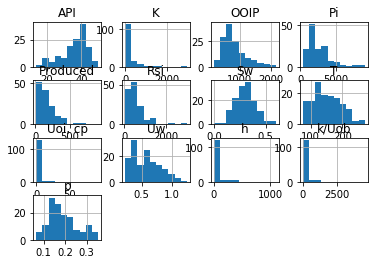

In [124]:
viz = df_data[['h', 'p', 'K', 'Sw', 'k/Uob', 'T', 'API', 'Pi', 'Uoi, cp', 'Uw', 'Rsi', 'OOIP', 'Produced']]
viz.hist()

<h2 id="correlation_causation">5. Correlation</h2>

<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>


<p>It is important to know the difference between these two and that correlation does not imply causation.</p>

<p3>Pearson Correlation</p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Total positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Total negative linear correlation.</li>
</ul>

In [125]:
df_data.corr(method='pearson')

,h,p,K,Sw,k/Uob,T,API,Pi,"Uoi, cp",Uw,Rsi,OOIP,Produced
h,1.000000,0.230689,0.119704,-0.050888,-0.043056,0.053898,-0.296761,-0.048039,0.152769,-0.105712,-0.064999,0.257883,0.187503
p,0.230689,1.000000,0.571821,0.089413,0.371222,0.090137,-0.497189,-0.119946,0.334650,-0.138648,-0.225649,0.877450,0.740413
K,0.119704,0.571821,1.000000,-0.205132,0.576231,0.014707,-0.389179,-0.134843,0.214313,-0.101855,-0.240524,0.675115,0.470432
Sw,-0.050888,0.089413,-0.205132,1.000000,-0.188728,-0.047739,0.125935,-0.122787,-0.022530,0.135900,0.021648,-0.254988,-0.172697
k/Uob,-0.043056,0.371222,0.576231,-0.188728,1.000000,0.193773,-0.063533,0.134137,-0.113318,-0.222483,0.043157,0.363514,0.208506
T,0.053898,0.090137,0.014707,-0.047739,0.193773,1.000000,0.017821,0.712436,-0.149706,-0.922392,0.302702,-0.054407,0.016234
API,-0.296761,-0.497189,-0.389179,0.125935,-0.063533,0.017821,1.000000,0.247847,-0.531135,0.051780,0.491720,-0.650025,-0.469621
Pi,-0.048039,-0.119946,-0.134843,-0.122787,0.134137,0.712436,0.247847,1.000000,-0.224867,-0.598063,0.690880,-0.292693,-0.151538
"Uoi, cp",0.152769,0.334650,0.214313,-0.022530,-0.113318,-0.149706,-0.531135,-0.224867,1.000000,0.107400,-0.257643,0.416776,0.246077
Uw,-0.105712,-0.138648,-0.101855,0.135900,-0.222483,-0.922392,0.051780,-0.598063,0.107400,1.000000,-0.221261,-0.045589,-0.107813


In [126]:
df_data.corr(method='kendall')

,h,p,K,Sw,k/Uob,T,API,Pi,"Uoi, cp",Uw,Rsi,OOIP,Produced
h,1.000000,0.007581,-0.048932,-0.091693,-0.086178,0.001580,-0.177797,0.036934,0.073026,-0.015321,0.027618,0.026436,-0.030267
p,0.007581,1.000000,0.502677,0.073048,0.291896,0.048103,-0.231521,-0.170127,0.128876,-0.076004,-0.156728,0.648715,0.559161
K,-0.048932,0.502677,1.000000,-0.157011,0.514728,0.115258,-0.252477,-0.140916,0.192054,-0.130580,-0.273683,0.579014,0.555544
Sw,-0.091693,0.073048,-0.157011,1.000000,-0.129318,-0.102379,0.113042,-0.074380,-0.057003,0.093302,0.108168,-0.187496,-0.132804
k/Uob,-0.086178,0.291896,0.514728,-0.129318,1.000000,0.341041,0.091282,0.168667,-0.290142,-0.330793,0.128062,0.222477,0.324797
T,0.001580,0.048103,0.115258,-0.102379,0.341041,1.000000,-0.033234,0.534960,-0.298217,-0.864838,0.185283,-0.018458,0.045806
API,-0.177797,-0.231521,-0.252477,0.113042,0.091282,-0.033234,1.000000,0.133759,-0.451297,0.050019,0.396195,-0.382799,-0.210962
Pi,0.036934,-0.170127,-0.140916,-0.074380,0.168667,0.534960,0.133759,1.000000,-0.417035,-0.488613,0.458523,-0.268407,-0.196380
"Uoi, cp",0.073026,0.128876,0.192054,-0.057003,-0.290142,-0.298217,-0.451297,-0.417035,1.000000,0.278576,-0.613200,0.334417,0.191061
Uw,-0.015321,-0.076004,-0.130580,0.093302,-0.330793,-0.864838,0.050019,-0.488613,0.278576,1.000000,-0.154530,-0.005118,-0.059328


In [127]:
df_data.corr(method='spearman')

,h,p,K,Sw,k/Uob,T,API,Pi,"Uoi, cp",Uw,Rsi,OOIP,Produced
h,1.000000,0.024635,-0.068973,-0.142795,-0.139420,-0.003020,-0.254851,0.045082,0.099228,-0.014777,0.039166,0.043804,-0.033122
p,0.024635,1.000000,0.679482,0.108996,0.406288,0.095506,-0.332544,-0.234485,0.180804,-0.148776,-0.234892,0.814649,0.741742
K,-0.068973,0.679482,1.000000,-0.233447,0.665325,0.198717,-0.364212,-0.219020,0.274318,-0.221701,-0.388635,0.761749,0.741705
Sw,-0.142795,0.108996,-0.233447,1.000000,-0.195426,-0.141327,0.164900,-0.127026,-0.093664,0.125520,0.158028,-0.273286,-0.180772
k/Uob,-0.139420,0.406288,0.665325,-0.195426,1.000000,0.514033,0.122820,0.242551,-0.415622,-0.508519,0.187012,0.315610,0.455791
T,-0.003020,0.095506,0.198717,-0.141327,0.514033,1.000000,-0.042678,0.725767,-0.436220,-0.969693,0.271301,-0.011323,0.076475
API,-0.254851,-0.332544,-0.364212,0.164900,0.122820,-0.042678,1.000000,0.188095,-0.600595,0.072405,0.548795,-0.526865,-0.315079
Pi,0.045082,-0.234485,-0.219020,-0.127026,0.242551,0.725767,0.188095,1.000000,-0.591881,-0.674396,0.625606,-0.385016,-0.287263
"Uoi, cp",0.099228,0.180804,0.274318,-0.093664,-0.415622,-0.436220,-0.600595,-0.591881,1.000000,0.414892,-0.789500,0.466131,0.276544
Uw,-0.014777,-0.148776,-0.221701,0.125520,-0.508519,-0.969693,0.072405,-0.674396,0.414892,1.000000,-0.228430,-0.033600,-0.109190


<b>P-value</b>: 
<p>P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

In [128]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df_data['h'], df_data['Produced'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
print("This correlation shows moderate evidence that the correlation is significant")

The Pearson Correlation Coefficient is 0.1875030548268798  with a P-value of P = 0.027083794117882743
This correlation shows moderate evidence that the correlation is significant


In [129]:
pearson_coef, p_value = stats.pearsonr(df_data['p'], df_data['Produced'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
print("This correlation shows strong evidence that the correlation is significant")

The Pearson Correlation Coefficient is 0.7404133482583092  with a P-value of P = 2.107685809765094e-25
This correlation shows strong evidence that the correlation is significant


In [130]:
pearson_coef, p_value = stats.pearsonr(df_data['K'], df_data['Produced'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
print("This correlation shows strong evidence that the correlation is significant")

The Pearson Correlation Coefficient is 0.4704323194500407  with a P-value of P = 5.111113076922766e-09
This correlation shows strong evidence that the correlation is significant


In [131]:
pearson_coef, p_value = stats.pearsonr(df_data['Sw'], df_data['Produced'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
print("This correlation shows moderate evidence that the correlation is significant")

The Pearson Correlation Coefficient is -0.17269670628727873  with a P-value of P = 0.04205462472931582
This correlation shows moderate evidence that the correlation is significant


In [132]:
pearson_coef, p_value = stats.pearsonr(df_data['k/Uob'], df_data['Produced'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
print("This correlation shows moderate evidence that the correlation is significant")

The Pearson Correlation Coefficient is 0.20850564628135318  with a P-value of P = 0.01377098943999628
This correlation shows moderate evidence that the correlation is significant


In [133]:
pearson_coef, p_value = stats.pearsonr(df_data['T'], df_data['Produced'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
print("This correlation shows no evidence that the correlation is significant")

The Pearson Correlation Coefficient is 0.016234364253311775  with a P-value of P = 0.8495564153934193
This correlation shows no evidence that the correlation is significant


In [134]:
pearson_coef, p_value = stats.pearsonr(df_data['API'], df_data['Produced'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
print("This correlation shows strong evidence that the correlation is significant")

The Pearson Correlation Coefficient is -0.4696214735892561  with a P-value of P = 5.474284598004875e-09
This correlation shows strong evidence that the correlation is significant


In [135]:
pearson_coef, p_value = stats.pearsonr(df_data['Pi'], df_data['Produced'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
print("This correlation shows weak evidence that the correlation is significant")

The Pearson Correlation Coefficient is -0.15153765301442187  with a P-value of P = 0.07495037673623474
This correlation shows weak evidence that the correlation is significant


In [136]:
pearson_coef, p_value = stats.pearsonr(df_data['Uoi, cp'], df_data['Produced'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
print("This correlation shows moderate evidence that the correlation is significant")

The Pearson Correlation Coefficient is 0.24607737116847264  with a P-value of P = 0.0034997474782406646
This correlation shows moderate evidence that the correlation is significant


In [137]:
pearson_coef, p_value = stats.pearsonr(df_data['Uw'], df_data['Produced'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
print("This correlation shows no evidence that the correlation is significant")

The Pearson Correlation Coefficient is -0.10781320461872454  with a P-value of P = 0.20647909000794804
This correlation shows no evidence that the correlation is significant


In [138]:
pearson_coef, p_value = stats.pearsonr(df_data['Rsi'], df_data['Produced'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
print("This correlation shows strong evidence that the correlation is significant")

The Pearson Correlation Coefficient is -0.2777242952370419  with a P-value of P = 0.0009325621929907407
This correlation shows strong evidence that the correlation is significant


In [139]:
pearson_coef, p_value = stats.pearsonr(df_data[ 'OOIP'], df_data['Produced'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
print("This correlation shows strong evidence that the correlation is significant")

The Pearson Correlation Coefficient is 0.7819812153187895  with a P-value of P = 6.476266127918555e-30
This correlation shows strong evidence that the correlation is significant


<p>A better understanding of what the data looks like and which variables are important to take into account when predicting the Produced oil has been established. We have narrowed it down to the following variables:</p>

<ul>
    <li>Height</li>
    <li>Porosity</li>
    <li>Permeability</li>
    <li>Water saturation</li>
    <li>Oil mobility (k/Uob)</li>
    <li>API</li>
    <li>Initial pressure</li>
    <li>Oil viscosity (Uoi, cp)</li>
    <li>Solution gas oil ratio @ initial pressure (Rsi)</li>
    <li>OOIP</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance. However, all variables will be inputed to see if the machine learning model will be robust enough to use only relevant features</p>

#### Let's use a heat map to visualize the relationship between input variables vs target.

<p>Visualization is very important in data science.</p>

<p>To get a better measure of the important characteristics, we look at the correlation of the input variables to see how the target is dependent on them</p>

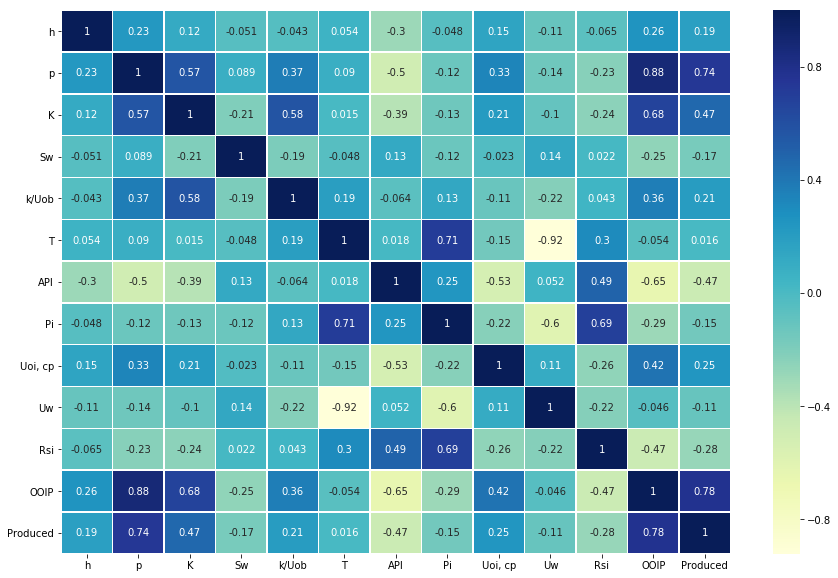

In [140]:
#Create Heatmap

fig, ax = plt.subplots(figsize=(15,10))
corrmap = sns.heatmap(df_data.corr(method='pearson'), annot=True, cmap="YlGnBu", linewidths=.5, ax=ax, cbar=True)

#Set all sides
corrmap.tick_params(right=False, top=False, labelright=False, labeltop=False,rotation=0)


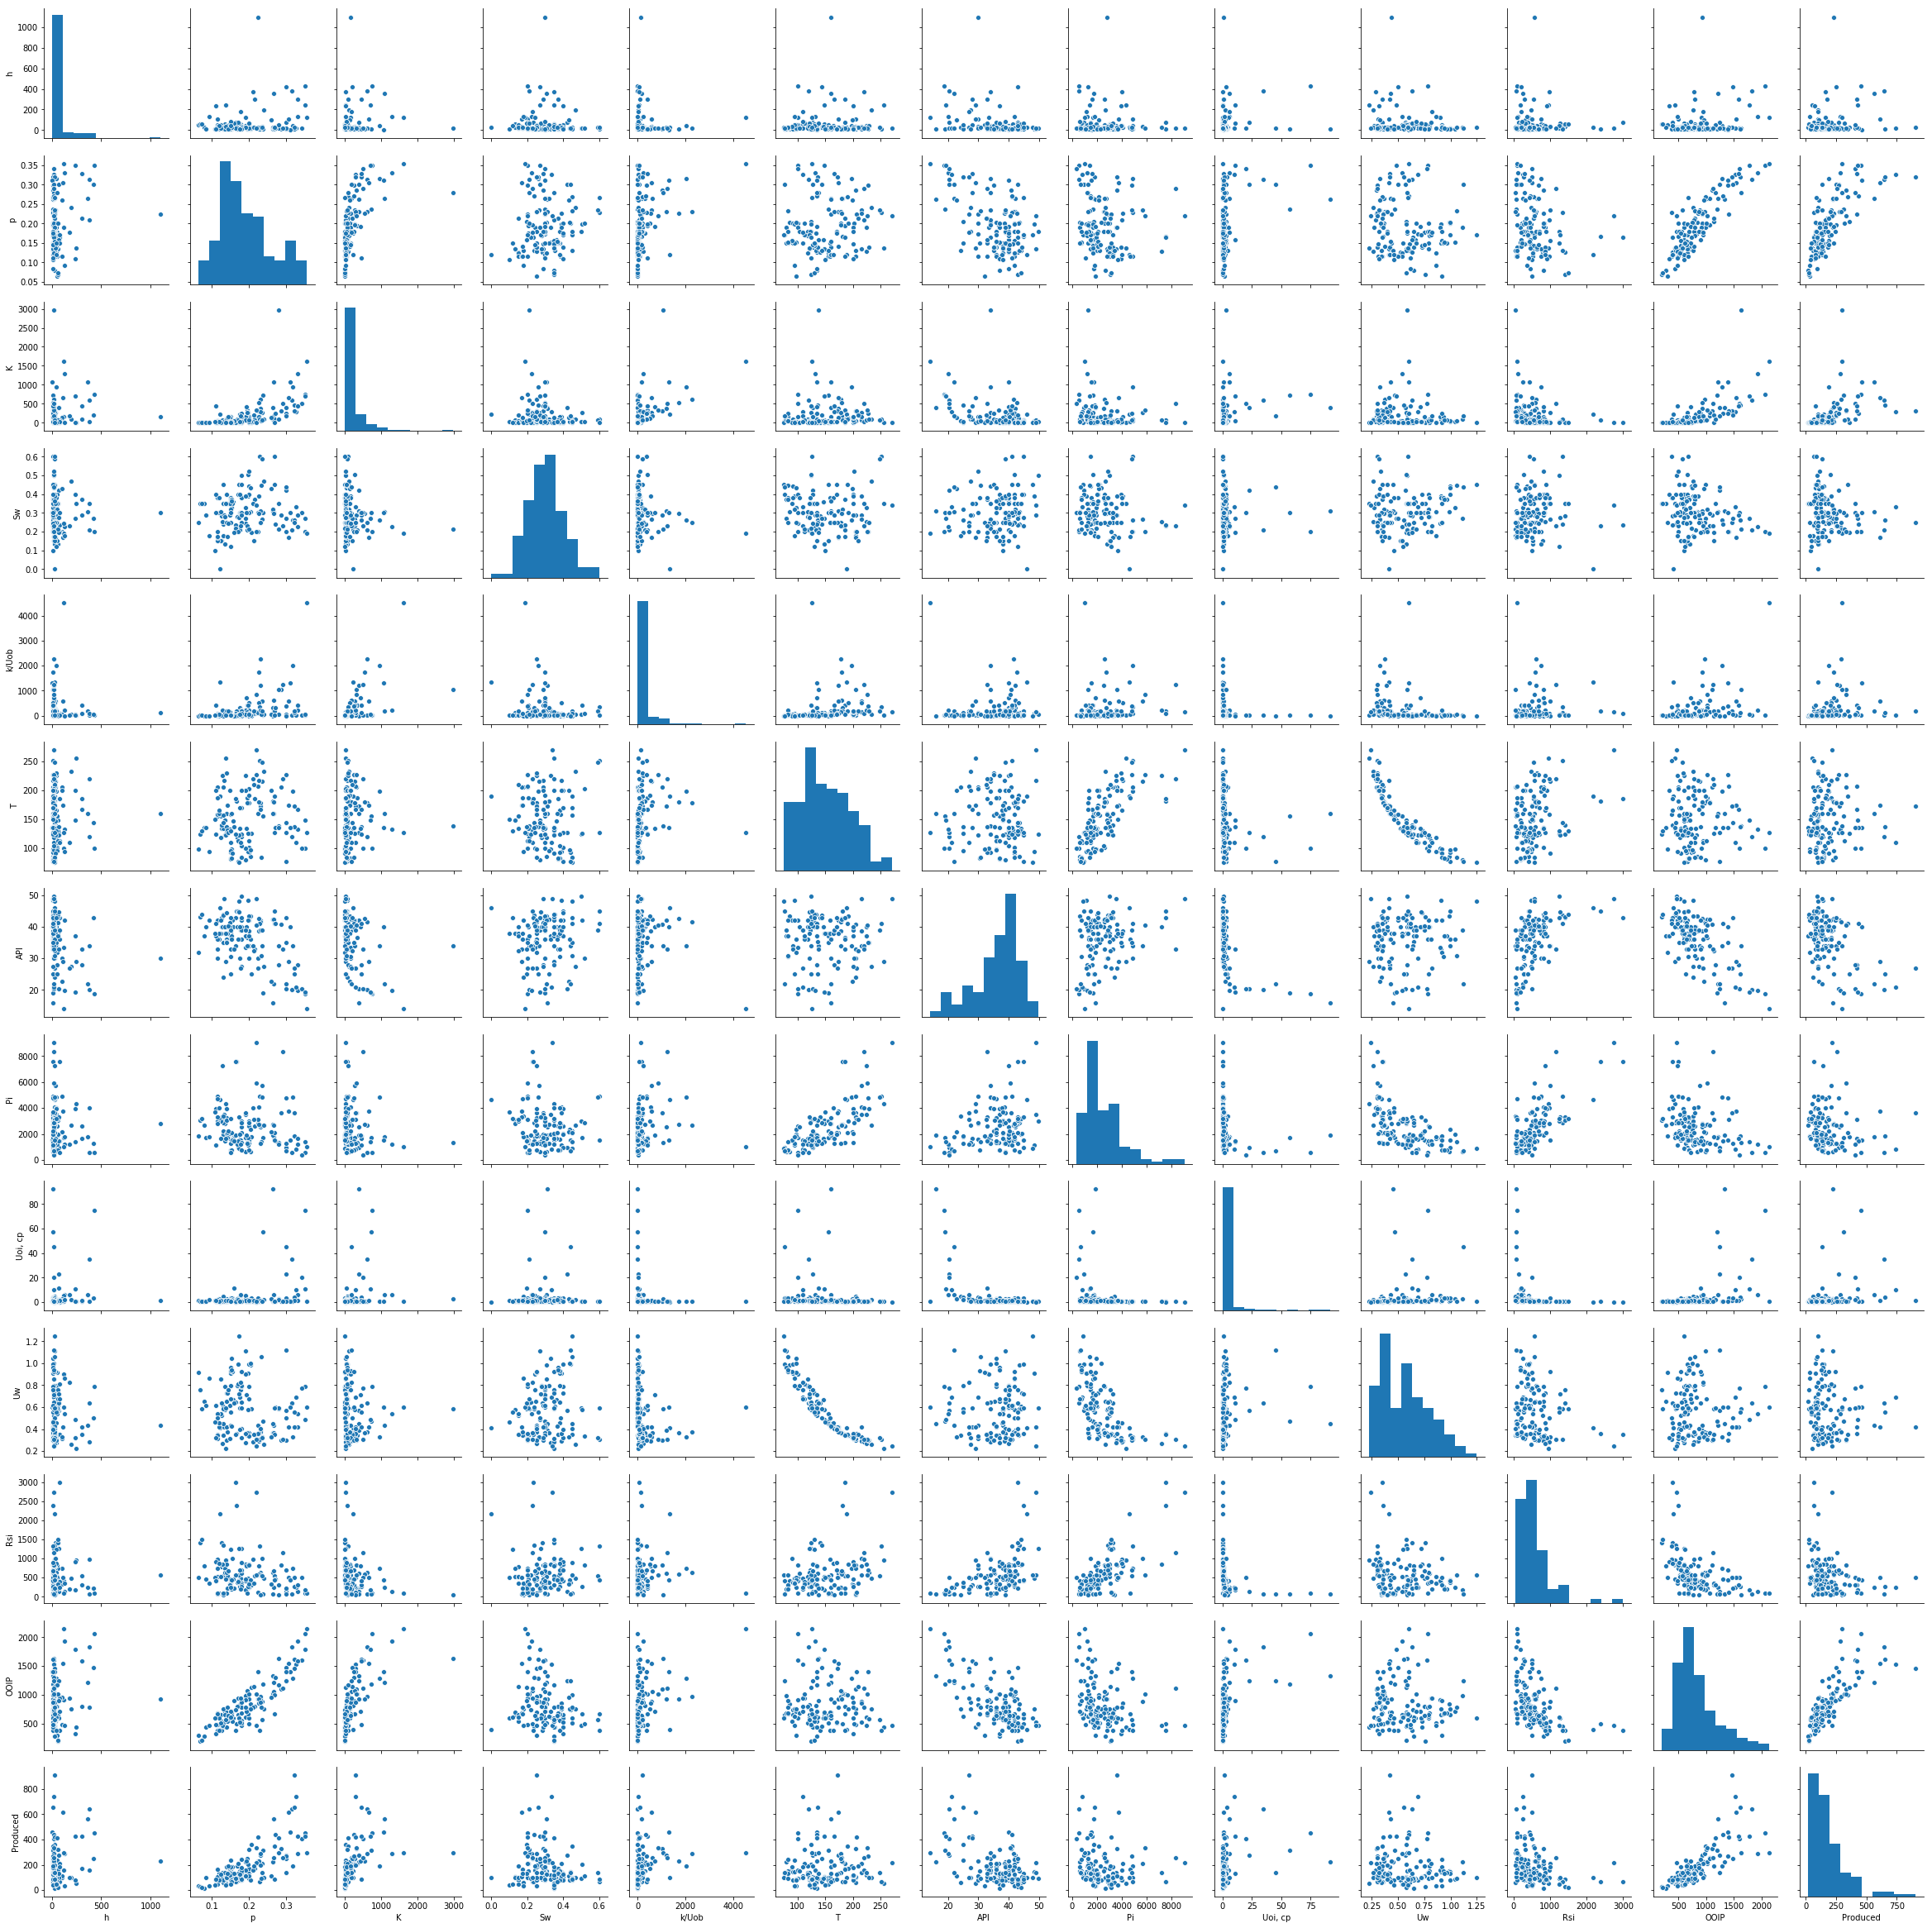

In [141]:
# Matrix of crossplots to visualize the variation between the parameters in the data set.
sns.pairplot(df_data[['h', 'p', 'K', 'Sw', 'k/Uob', 'T', 'API', 'Pi', 'Uoi, cp', 'Uw', 'Rsi', 'OOIP', 'Produced']])

<h2 id="feature_selection">Feature Selection</h2>
Before we start dropping the redundant independent variables, let us check the Variance inflation factor (VIF) among the independent variables. VIF quantifies the severity of multicollinearity in an ordinary least squares regression analysis. It provides an index that measures how much the variance (the square of the estimate’s standard deviation) of an estimated regression coefficient is increased because of collinearity. I will encourage you all to read the Wikipedia page on Variance inflation factor to gain a good understanding of it.

We calculate the VIF of each independent variables and print it. We will create a new DataFrame without RF as we aim to determine the VIF among the potential independent variables.

In [142]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [143]:
new_data = df_data
new_data.head()

,h,p,K,Sw,k/Uob,T,API,Pi,"Uoi, cp",Uw,Rsi,OOIP,Produced
0,8.0,0.203,42.3,0.308,56.40,85,43.5,630,0.75,0.988,407,839,150
1,10.0,0.200,59.0,0.441,28.23,92,34.0,1513,2.09,0.992,375,735,147
2,17.9,0.126,45.0,0.150,68.18,134,40.0,3050,0.66,0.528,790,535,78
3,8.0,0.285,312.0,0.290,1040.00,205,40.9,3630,0.30,0.299,830,1107,330
4,13.0,0.200,166.0,0.300,212.82,178,38.6,1300,0.81,0.367,235,922,138


In [144]:
new_data=new_data.drop(["Produced"], axis=1)
vif = pd.DataFrame()
vif["features"] = new_data.columns
vif["vif_Factor"] = [variance_inflation_factor(new_data.values, i) for i in range(new_data.shape[1])]
print(vif)

   features  vif_Factor
0         h    1.473577
1         p  162.145981
2         K    3.374190
3        Sw   37.181633
4     k/Uob    2.222308
5         T   55.132396
6       API   45.056565
7        Pi   16.241593
8   Uoi, cp    1.714609
9        Uw   25.101857
10      Rsi    8.999168
11     OOIP  144.364408


In general, we should aim for the VIF of less than 10 for the independent variables.
Based on our understanding from heatmap and VIF result let us drop all columns with VIF above 10 as a potential candidate for the independent variable for our model and re-evaluate the VIF.